## import required libraries and read the csv file.

In [59]:
import wordcloud
import re
import random
from bs4 import BeautifulSoup
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
data = pd.read_csv('india.csv')
data

,flair,title,score,id,url,comms_num,body,author,comments,timestamp
0,AskIndia,"Attractive men, what type of attention do you ...",20,cprtaa,https://www.reddit.com/r/india/comments/cprtaa...,21,"xposted from /r/askmen, posted here because In...",sleepless_indian,My mom says I'm good looking. Can I answer? \...,2019-08-14 00:59:47
1,AskIndia,[askindia] My brothers bank account was hacked...,37,dacmel,https://www.reddit.com/r/india/comments/dacmel...,64,My brother received bunch of SMS this morning ...,prtthrowaway,I ll copy paste one of my previous comments-\...,2019-09-28 20:17:34
2,AskIndia,[AskIndia] What song is this ?,5,comakt,https://www.reddit.com/r/india/comments/comakt...,6,Often when I think of home there is a particul...,lockworm,hamari adhoori kahani (aka bheegi bheegi si h...,2019-08-11 08:46:23
3,AskIndia,[AskIndia][Serious] Is it worth attempting imm...,59,c4ilk5,https://www.reddit.com/r/india/comments/c4ilk5...,115,Title. \n\nFrom what I understand based on arm...,aashish2137,NRI with a fairly neutral opinion here.\n\nSo...,2019-06-24 18:41:18
4,AskIndia,[AskIndia] What are some cheap but reliable an...,20,dpmgmj,https://www.reddit.com/r/india/comments/dpmgmj...,25,I won't play games or edit videos.\n\nI will u...,advice2019-,There is no way you can future proof anything...,2019-11-01 01:27:04
...,...,...,...,...,...,...,...,...,...,...
1313,Coronavirus,Coronavirus Tests per Million,77,fyaofg,https://i.redd.it/shkyb7b4xxr41.png,24,NaN,india_ko_vanakkam,Plotting it like this is very misleading. The...,2020-04-10 20:39:49
1314,Coronavirus,"Coronavirus: Amazon, Flipkart, Big Basket, Gro...",387,foig1f,https://gadgets.ndtv.com/internet/news/amazon-...,41,NaN,Ib90,"In my area, even the essential shops like gro...",2020-03-25 15:55:23
1315,Coronavirus,People In India Are Dropping Dead After Walkin...,228,frzf64,https://www.vice.com/en_us/article/qjd5z5/peop...,32,NaN,paone22,The whole shit was started by yogi. He told e...,2020-03-31 10:45:00
1316,Coronavirus,Coronavirus: World Bank approves USD 1 billion...,261,ftrk1e,https://twitter.com/PTI_News/status/1245776178...,40,NaN,aviakki1,That's a loan right?\n\nPM Cares fund has alr...,2020-04-03 07:54:07


### use tokenizer to tokenize titles to form wordcloud of of subreddit r/India.

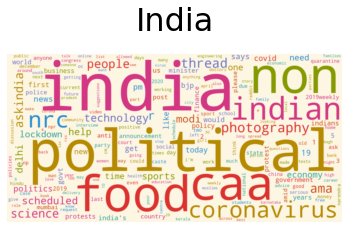

In [61]:
tokenizer = RegexpTokenizer(r"[\w']+")

all_titles = ''.join([x.lower() for x in data['title']])
all_flairs = ([x.lower() for x in data['flair']])
words = list(tokenizer.tokenize(all_titles))

words = [x for x in words if x not in stopwords.words('english')]

# word cloud
def col_func(word, font_size, position, orientation, font_path, random_state):
	colors = ['#b58900', '#cb4b16', '#dc322f', '#d33682', '#6c71c4', '#268bd2', '#2aa198', '#859900']
	return random.choice(colors)

fd = {
	'fontsize':'32',
	'fontweight':'normal',
	'verticalalignment':'baseline',
	'horizontalalignment':'center',
}

wc = wordcloud.WordCloud(width=1500, height=750, collocations=False, background_color="#fdf6e3",color_func=col_func,max_words=200,random_state=np.random.randint(1,8)).generate_from_frequencies(dict(Counter(words)))
name = "India"
fig, ax = plt.subplots()
ax.imshow(wc, interpolation="bilinear")
ax.axis("off")
ax.set_title(name, pad=24, fontdict=fd)
plt.show()

### barplot using seaborn of flairs of each type.

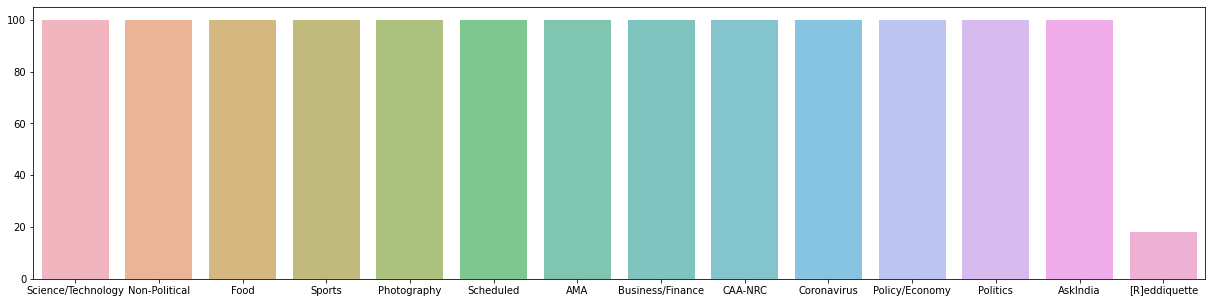

In [62]:
count = data['flair'].value_counts()
plt.figure(figsize=(21,5))
sns.barplot(count.index, count.values, alpha=0.7)
plt.show()

### functions for cleaning and regularizing the data in csv file. Replaced special symbols by space, removed bad ### words and filtered stops words of english grammar. 

In [63]:
flairs = ["AskIndia", "Non-Political", "[R]eddiquette", "Scheduled", "Photography", "Science/Technology", "Politics", "Business/Finance", "Policy/Economy", "Sports", "Food", "AMA", "CAA-NRC","Coronavirus"]

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def string_form(value):
    return str(value)

def clean_text(text):
    text = BeautifulSoup(text).text
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

### use the above functions to regularize data and save it for further processing.

In [64]:
data['title'] = data['title'].apply(string_form)
data['body'] = data['body'].apply(string_form)
data['comments'] = data['comments'].apply(string_form)
data['comms_num'] = data['comms_num'].apply(string_form)

data['title'] = data['title'].apply(clean_text)
data['body'] = data['body'].apply(clean_text)
data['comments'] = data['comments'].apply(clean_text)

feature_combine = data["title"] + data["comments"] + data["body"] + data["comms_num"]
data = data.assign(feature_combine = feature_combine)

In [65]:
data.to_csv('final.csv')